In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [2]:
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

In [3]:
train_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [4]:
train_df.isna().sum()

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

In [5]:
test_df.isna().sum()

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

In [6]:
x_train_df = train_df.drop(['가격'], axis=1)
x_test_df = test_df.drop(['가격'], axis=1)
y_train_df = train_df['가격']
y_test_df = test_df['가격']

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough') # 리마인더 패스스루를 사용하지 않으면 다른 칼럼들이 함께하지 못한다.

transformer.fit(x_train_df)
x_train = transformer.transform(x_train_df)
x_test = transformer.transform(x_test_df)
x_train[0]
"""
    array([0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 2.015e+03, 1.180e+01, 1.720e+02,
       2.100e+01, 0.000e+00, 1.999e+03, 1.300e+03])
    
    0,0,1,0,0,1,0,0,1,2015,11.8,172,21,0,1999,1300
    종류,연료,변속기/연도,연비,마력,토크,베기량,중량
    
    더미변수는 칼럼의 순서를 유지하면서 [0,0,0]과 같은 값이 들어고,
    트랜스포머는 원핫인코더로 편한 값들이 먼저 나온다.
"""

'\n    array([0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,\n       0.000e+00, 0.000e+00, 1.000e+00, 2.015e+03, 1.180e+01, 1.720e+02,\n       2.100e+01, 0.000e+00, 1.999e+03, 1.300e+03])\n    \n    0,0,1,0,0,1,0,0,1,2015,11.8,172,21,0,1999,1300\n    종류,연료,변속기/연도,연비,마력,토크,베기량,중량\n    \n    더미변수는 칼럼의 순서를 유지하면서 [0,0,0]과 같은 값이 들어고,\n    트랜스포머는 원핫인코더로 편한 값들이 먼저 나온다.\n'

In [8]:
np.mean(x_train)

372.99665492957746

In [9]:
def norm(x):
  return (x - np.mean(x_train)) / np.mean(x_train)
normed_train_data = norm(x_train)
normed_test_data = norm(x_test)

In [10]:
np.shape(x_train)

(71, 16)

In [45]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[np.shape(x_train)[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  # 오차가 십만이 넘어 가서 그 차이를 줄이려면 러닝레이트를 조정하자
  # 이전 w, b와 그 다음 w, b를 조절하기 위해서는 그 폭을 크게 하자
  optimizer = tf.keras.optimizers.Adam(100)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()

In [46]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 30ms/step


array([[-0.45904097],
       [-0.48868567],
       [-0.5460299 ],
       [-0.522579  ],
       [-0.342367  ],
       [-0.3349762 ],
       [-0.34904426],
       [-0.54085207],
       [-0.3975103 ],
       [-0.540535  ]], dtype=float32)

In [14]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, y_train_df,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,308076.968750,436.952576,308076.968750,1.202495e+06,710.115112,1.202495e+06,995
996,192798.921875,346.374908,192798.921875,7.049989e+05,560.065674,7.049989e+05,996
997,159236.421875,310.084259,159236.421875,7.234632e+05,557.747681,7.234632e+05,997
998,166583.859375,332.356598,166583.875000,1.213198e+06,723.800781,1.213198e+06,998
999,190269.453125,329.522858,190269.453125,7.401788e+05,569.318726,7.401788e+05,999


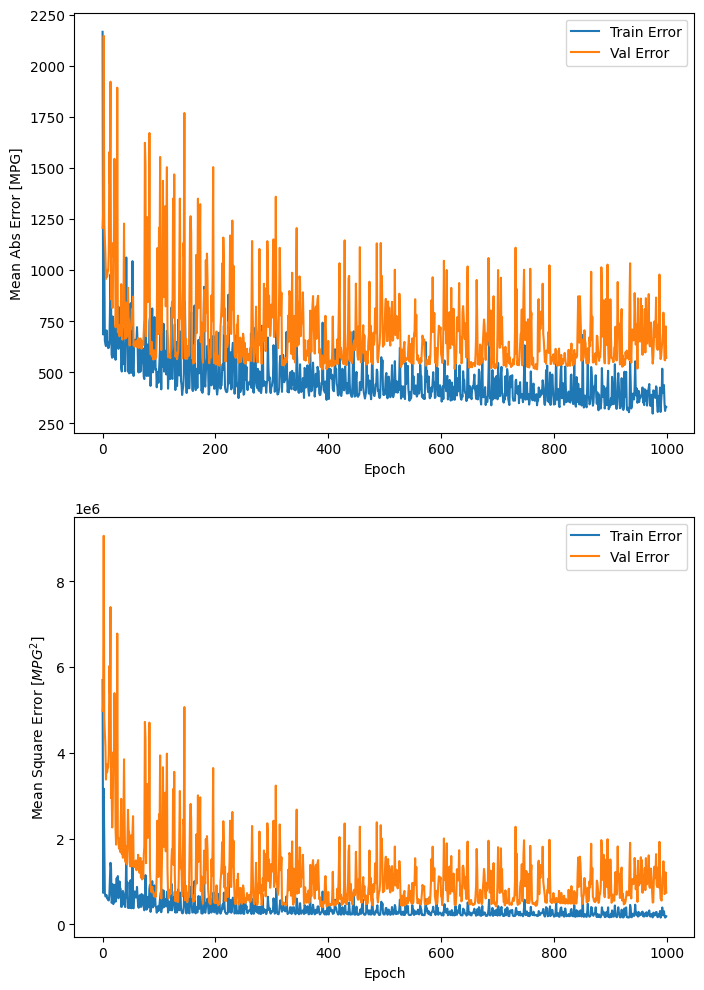

In [16]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  # plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


...............................................................

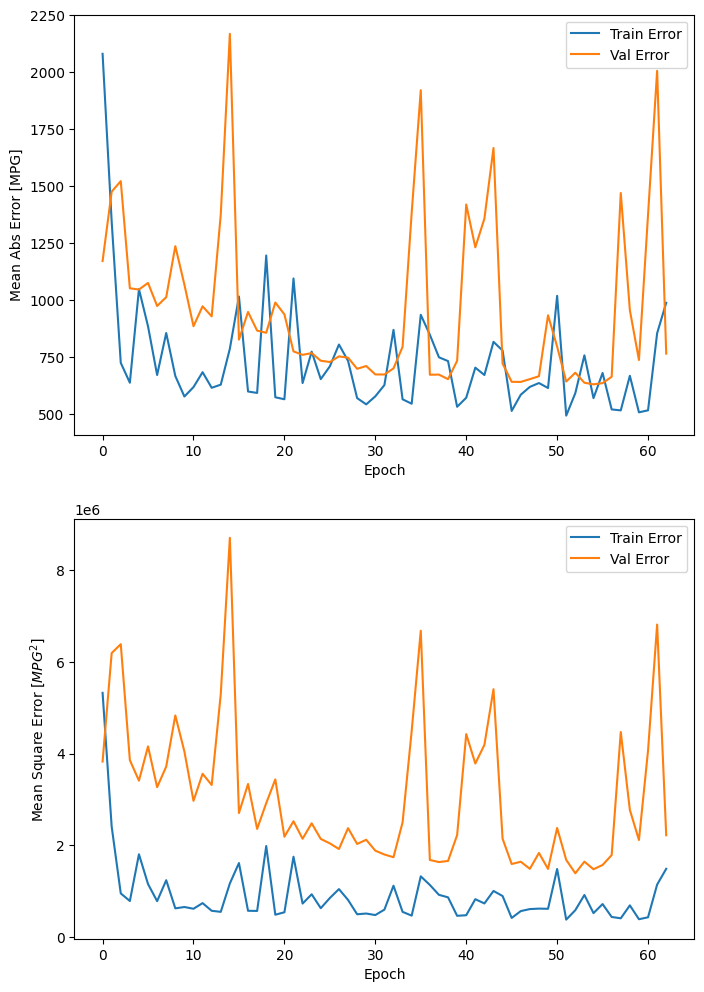

In [17]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, y_train_df, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [18]:
loss, mae, mse = model.evaluate(normed_test_data, y_test_df, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

1/1 - 0s - loss: 2934816.0000 - mae: 696.7245 - mse: 2934816.0000 - 15ms/epoch - 15ms/step
테스트 세트의 평균 절대 오차: 696.72 MPG


1/1 [==============================] - 0s 34ms/step


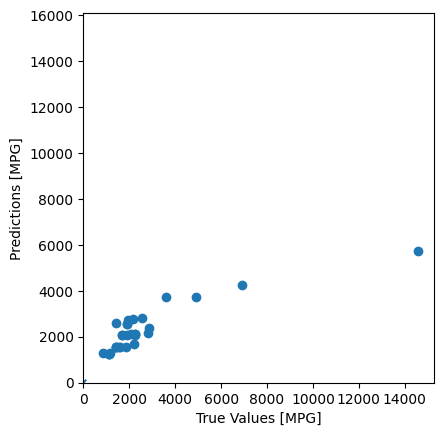

In [19]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(y_test_df, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

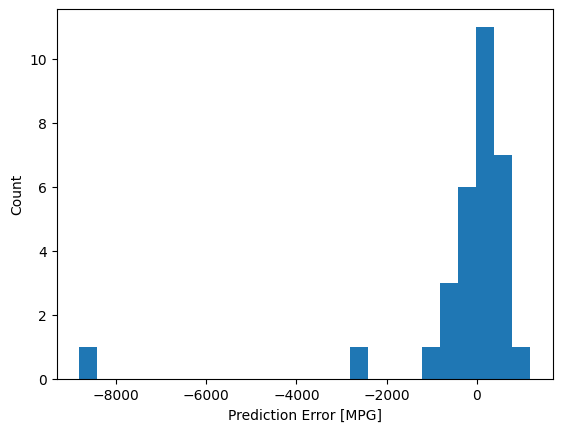

In [20]:
error = test_predictions - y_test_df
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")